# 線形代数の基礎
ベクトルとは有限次元空間内の点.

例えば、身長、体重、年齢というデータがあったとすると, このデータは3次元のベクトル`[身長, 体重, 年齢]`として扱うことができる.



In [2]:
height_weight_age = [177, # 身長
                     68,  # 体重
                     25,  # 年齢
                    ]

## ベクトル演算
ベクトルは**要素ごとに**加算を行う.

例えば, 2つのベクトル[1, 2]と[2, 1]の和は、[1 + 1, 2 + 1]であり, その和は[3, 3]となる.


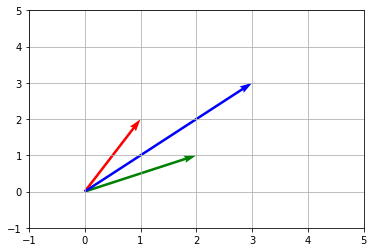

In [3]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([1, 2])
b = np.array([2, 1])
c = a + b

origin = [0, 0, 0] # 原点(0, 0)
d = np.array([a, b, c])
U = d.T[0] # 転置を取ってx成分取り出し
V = d.T[1] # 転置を取ってy成分取り出し

plt.quiver(origin, origin, U, V, angles='xy', scale=1, scale_units='xy', color=['r', 'g', 'b'])

plt.xlim([-1, 5])
plt.ylim([-1, 5])

plt.grid()
plt.show()


In [4]:
# numpyを使わない方法でベクトル加算を実装する方法
from typing import List

# floatのリストに対してVectorという型エイリアスをつける
Vector = List[float]

def add(v: Vector, w: Vector) -> Vector:
    # 引数で渡されたリストの長さが異なるとassertionError
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

# add()のテストコード
assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9], "Not working as expected"

x = [1, 2, 3]
y = [2, 4, 6]
add(x, y)

[3, 6, 9]

In [5]:
## Numpyを使ってベクトル加算を実装する方法

x = np.array([1, 2, 3])
y = np.array([2, 4, 6])
x + y

array([3, 6, 9])

In [6]:
# ベクトルのリストに対して、要素ごとの和を求める実装

def vector_sum(vectors: List[Vector]) -> Vector:
    # ベクトルに要素があることを確認
    assert vectors, "no vectors provided!"

    # ベクトルの長さが全て同じであることを確認
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # i番目の要素は, 各ベクトル[i]の合計
    return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

# vector_sum()のテストコード
assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]

In [7]:
# ベクトルのリストに対して、要素ごとの和を求める実装(Numpyを使う)
x = np.array([[1, 2],
              [3, 4],
              [5, 6],
              [7, 8]])

# 行方向に足し合わせる
x.sum(axis=0)

array([16, 20])

## ベクトルとスカラーの乗算
単にベクトルの各要素に数値を乗じるだけ.

In [8]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    # 各要素にcを乗ずる
    return [c * v_i for v_i in v]

# scalar_multiply()のテスト
assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]